Импорт блок

In [ ]:
#Импорт библиотек
import pandas as pd
import nltk
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from keras import models
from keras import layers
from keras.optimizers import Adam
from keras import optimizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Новый раздел

In [ ]:
data_from_internet = pd.read_csv('database.csv', engine='python')
data_from_internet[data_from_internet["class"] == 6].iloc[0]["content"]

'As soon as he learned about the existence of ancient wheat specimens at University College London’s Petrie Museum of Egyptian Archaeology from a 2018 BBC documentary, Richard Mott of the UCL Genetics Institute wanted to study them. The samples likely contained bits of ancient wheat DNA, he reasoned, which could yield valuable insights into the history of cultivation of this all-important crop species.\n\nArchaeobotanists at UCL helped Mott and a team of collaborators choose a handful of well-preserved husks from the museum’s collection of ancient emmer wheat, a variety native to the Near East and one of the first crops to be domesticated in the region, from which the researchers selected two husks for DNA extraction. After carefully removing the husks from the box, photographing them, and wrapping them in foil, the scientists transported the centuries-old plant material to a freshly bleached cleanroom used exclusively to process ancient and forensic samples. \nThere, team member Laura

In [ ]:
nltk.download("stopwords") #Удаление стоп-слов
nltk.download('punkt') #Деление текста на список предложений
nltk.download('wordnet') #Проведение лемматизации
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def lemmatize_text(in_text):
    out_text = re.sub("[^a-zA-Z]"," ",in_text) #Удаление неалфавитных символов  
    #text = nltk.word_tokenize(text,language = "english") #Токенизация слов
    out_text = [lemmatize.lemmatize(word) for word in out_text] #Лемматизация слов  
    out_text = "".join(out_text) #Соединение слов
    return out_text


In [ ]:
new_text = []
lemmatize = nltk.WordNetLemmatizer()
for i in data_from_internet["content"]:
  new_text.append(lemmatize_text(i))

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", min_df=0.01, max_df=0.9  ) 
tfidf_vectorizer = tfidf_vectorizer.fit(new_text)
values = tfidf_vectorizer.transform(new_text) #Преобразование текста
values.shape

(1000, 3281)

In [ ]:
tfidf_vectorizer.get_feature_names()[:10]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandoned',
 'ability',
 'able',
 'abroad',
 'absence',
 'absolutely',
 'abuse',
 'ac',
 'academy',
 'accept']

In [ ]:
#Сохранение векторизатора TFIDF в файл
pkl_filename_tfidf = "Pickle_RL_Model_tfidf.pkl"  

with open(pkl_filename_tfidf, 'wb') as file:  
    pickle.dump(tfidf_vectorizer, file)

In [ ]:
X = values.toarray()
y = data_from_internet["class"].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) #Разделение выборки на тестовую и обучающую

In [ ]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
predicted_bayes = nb.predict(x_test)
print(metrics.classification_report(predicted_bayes, y_test))
nb.score(x_test,y_test)

              precision    recall  f1-score   support

           1       0.72      0.93      0.81        28
           2       0.82      0.75      0.78        24
           3       0.87      0.84      0.86        32
           4       0.75      0.94      0.83        32
           5       0.74      0.97      0.84        29
           6       1.00      0.77      0.87        39
           7       0.82      0.97      0.89        33
           8       0.82      0.56      0.67        41
           9       0.83      1.00      0.91        24
          10       0.92      0.71      0.80        48

    accuracy                           0.82       330
   macro avg       0.83      0.84      0.83       330
weighted avg       0.84      0.82      0.82       330



0.8242424242424242

Загрузим векторизатор (этот код будет в приложении!!!)

In [ ]:
with open(pkl_filename_tfidf, 'rb') as file:  
    pickled_tfidf_vectorizer = pickle.load(file)

### Сохраним модель Наивный байесовский классификатор 

In [ ]:
#Сохранение модели в файл
pkl_filename_nb = "Pickle_RL_Model_nb.pkl"  

with open(pkl_filename_nb, 'wb') as file:  
    pickle.dump(nb, file)

### Загрузка модели из файл + предсканием

In [ ]:
#Загрузка из файла 
with open(pkl_filename_nb, 'rb') as file:  
    pickled_nb_model = pickle.load(file)

### Векторизуем тексты (полученные из интерфейса), для которых хотим предсказать. 
Будем исползовать загруженный из файла векторизатор (этот код для приложения!!!)


In [ ]:
list_text =[]
for num_f in range(3):
  file_name = f"f6_0{str(num_f)}.txt"
  with open(file_name) as f:
    t = f.read()
    list_text.append(t)

texts_for_predict = list_text + ["Education is about learning skills and knowledge. It also means helping people to learn how to do things and support them to think about what they learn. It's also important for educators to teach ways to find and use information. Education needs research to find out how to make it better", 
            "Education may help and guide individuals from one class to other. Educated individuals and groups can do things like, help less educated people and encourage them to get educated."]

test_text = [lemmatize_text(text) for text in texts_for_predict] #Предподготовка

X_test_vector = pickled_tfidf_vectorizer.transform(test_text) #Векторизация нового текста
X_test_vector.shape

(5, 3281)

### Предсказываем, используя Наивный байесовский классификатор, загруженный из файла 
Код для приложения!!!

In [ ]:
with open(pkl_filename_nb, 'rb') as file:  
    pickled_nb_model = pickle.load(file)

In [ ]:
#Вероятность
Y_test_pred=pickled_nb_model.predict(X_test_vector.toarray())
for result in Y_test_pred:
  print(f"Вероятность для всех классов: {result}")

#Задаем порог 0.5 для классификации текста
Y_test_pred_int=(Y_test_pred>=0.5).astype("int")

for result in Y_test_pred_int:
  print(f"Результаты классификации для каждого класса (порог 0.5): {result}")

Вероятность для всех классов: 6
Вероятность для всех классов: 6
Вероятность для всех классов: 6
Вероятность для всех классов: 10
Вероятность для всех классов: 10
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1


## Логистическая регрессия (LogisticRegression)

In [ ]:
logreg = LogisticRegression()
logreg = logreg.fit(x_train, y_train)
predicted_logreg = logreg.predict(x_test)
print(metrics.classification_report(predicted_logreg, y_test))
logreg.score(x_test,y_test)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        34
           2       1.00      0.92      0.96        24
           3       1.00      0.91      0.95        34
           4       0.97      1.00      0.99        39
           5       0.97      0.95      0.96        39
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        39
           8       0.89      0.89      0.89        28
           9       0.97      1.00      0.98        28
          10       0.95      1.00      0.97        35

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



0.9696969696969697

In [ ]:
#Сохранение модели в файл
pkl_filename_logreg = "Pickle_RL_Model_logreg.pkl"  

with open(pkl_filename_logreg, 'wb') as file:  
    pickle.dump(logreg, file)

with open(pkl_filename_logreg, 'rb') as file:  
    pickled_logreg_model = pickle.load(file)

In [ ]:
#Вероятность
Y_test_pred=pickled_logreg_model.predict(X_test_vector.toarray())
for result in Y_test_pred:
  print(f"Вероятность для всех классов: {result}")

#Задаем порог 0.5 для классификации текста
Y_test_pred_int=(Y_test_pred>=0.5).astype("int")

for result in Y_test_pred_int:
  print(f"Результаты классификации для каждого класса (порог 0.5): {result}")

Вероятность для всех классов: 6
Вероятность для всех классов: 6
Вероятность для всех классов: 6
Вероятность для всех классов: 10
Вероятность для всех классов: 7
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1
Результаты классификации для каждого класса (порог 0.5): 1


### Метод опорных векторов (SVM)

In [ ]:
metodsvm = svm.SVC()
metodsvm = metodsvm.fit(x_train, y_train)
predicted_svm = metodsvm.predict(x_test)
print(metrics.classification_report(predicted_svm, y_test))
metodsvm.score(x_test, y_test)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        34
           2       1.00      0.96      0.98        23
           3       1.00      0.91      0.95        34
           4       0.97      1.00      0.99        39
           5       1.00      0.93      0.96        41
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        39
           8       0.89      0.93      0.91        27
           9       0.97      1.00      0.98        28
          10       0.95      1.00      0.97        35

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



0.9727272727272728

In [ ]:
#Сохранение модели в файл
pkl_filename_svm = "Pickle_RL_Model_svm.pkl"  

with open(pkl_filename_svm, 'wb') as file:  
    pickle.dump(metodsvm, file)

with open(pkl_filename_svm, 'rb') as file:  
    pickled_svm_model = pickle.load(file)

In [ ]:
#Вероятность
Y_test_pred=pickled_svm_model.predict(X_test_vector.toarray())
for result in Y_test_pred:
  print(f"Определился класс: {result}")

Определился класс: 6
Определился класс: 6
Определился класс: 6
Определился класс: 10
Определился класс: 8


In [ ]:
#Адаптивный бустинг
modelClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators=200, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

modelClf_fit = modelClf.fit(X_train, y_train)
modelClf.score(X_valid, y_valid)

0.8939393939393939

In [ ]:
#Сохранение модели в файл
pkl_filename_Clf_Ada = "Pickle_RL_Model_Clf_Ada.pkl"  

with open(pkl_filename_Clf_Ada, 'wb') as file:  
    pickle.dump(modelClf, file)

with open(pkl_filename_Clf_Ada, 'rb') as file:  
    pickled_Clf_Ada_model = pickle.load(file)

In [ ]:
#Градиентный бустинг
modelClf = GradientBoostingClassifier(max_depth=20, n_estimators=150,random_state=12, learning_rate=0.005)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.3, random_state=12)

modelClf.fit(X_train, y_train)
modelClf.score(X_valid, y_valid)

0.7566666666666667

In [ ]:
#Сохранение модели в файл
pkl_filename_Clf_Grad = "Pickle_RL_Model_Clf_Grad.pkl"  

with open(pkl_filename_Clf_Grad, 'wb') as file:  
    pickle.dump(modelClf, file)

with open(pkl_filename_Clf_Grad, 'rb') as file:  
    pickled_Clf_Grad_model = pickle.load(file)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
model = models.Sequential()

In [ ]:
voc_len = 26678

In [ ]:
model.add(layers.Dense(64,activation='relu'))# ,input_shape=(voc_len,)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(np.array(x_train), np.array(y_train), epochs=20, verbose=0, batch_size=512,validation_data=(x_test,y_test))

In [ ]:
history_dict = history.history
history_dict.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

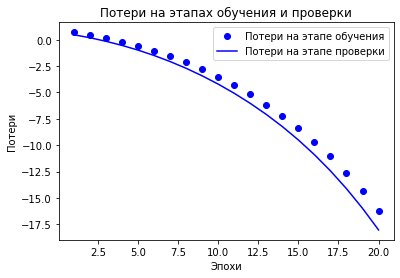

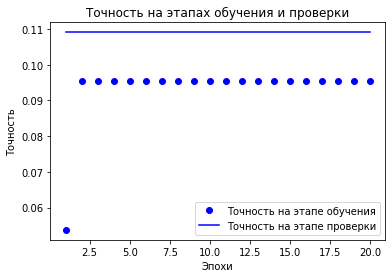

In [ ]:
#Построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

#Построение графика потери на этапах проверки и обучения
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label = 'Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label = 'Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

#Построение графика точности на этапах обучения и проверки
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
Y_pred=model.predict(x_test)
#Задаем порог 0,5 для классификации текста
Y_pred=(Y_pred>=0.5).astype("int")
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))

11/11 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           1       0.11      1.00      0.20        36
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00        29
          10       0.00      0.00      0.00        37

    accuracy                           0.11       330
   macro avg       0.01      0.10      0.02       330
weighted avg       0.01      0.11      0.02       330

[[36  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0]
 [31  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0  0]
 [38  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
